In [1]:
# Load Python Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

In [13]:
# Read in Data
raman_data = pd.read_csv("./Data/raman_data.csv", sep = ',', decimal = ',', index_col=1, na_values = 'Nan')
display(raman_data.shape)
raman_data

(624, 1115)

Sample  Antibiotic Class Experiment Cell line       600       601  \
Well ID                                                                      
H2            1           Control      Rep 1     MDS42  0.007554  0.007761   
G2            2           Control      Rep 1     MDS42  0.007305  0.006389   
F2            3           Control      Rep 1     MDS42  0.006951  0.006401   
E2            4           Control      Rep 1     MDS42  0.006150  0.005982   
D2            5           Control      Rep 1     MDS42  0.008663  0.009366   
C2            6           Control      Rep 1     MDS42  0.006630  0.006760   
B2            7           Control      Rep 1     MDS42  0.004896  0.005335   
A2            8           Control      Rep 1     MDS42  0.007469  0.005063   
A3            9           Control      Rep 1     MDS42  0.007329  0.006250   
B3           10           Control      Rep 1     MDS42  0.005890  0.005783   
C3           11           Control      Rep 1     MDS42  0.007556  0.006615   
D3           12           Control      Rep 1     MDS42  0.006538  0.005968   
E3           13           Control      Rep 1     MDS42  0.006234  0.005891   
F3           14           Control      Rep 1     MDS42  0.004159  0.004194   
G3           15           Control      Rep 1     MDS42  0.006529  0.007255   
H3           16           Control      Rep 1     MDS42  0.007487  0.006487   
H4           17  Folic Acid Synth      Rep 1        TP  0.005947  0.005082   
G4           18  Folic Acid Synth      Rep 1        TP  0.009333  0.007705   
F4           19  Folic Acid Synth      Rep 1        TP  0.009882  0.009011   
E4           20  Folic Acid Synth      Rep 1        TP  0.008077  0.007761   
D4           21  Folic Acid Synth      Rep 1        TP  0.008617  0.008316   
C4           22  Folic Acid Synth      Rep 1        TP  0.007413  0.007468   
B4           23  Folic Acid Synth      Rep 1        TP  0.005334  0.005446   
A4           24  Folic Acid Synth      Rep 1        TP  0.005192  0.004695   
A5           25  Folic Acid Synth      Rep 1        TP  0.007792  0.008536   
B5           26  Folic Acid Synth      Rep 1        TP  0.006829  0.006751   
C5           27  Folic Acid Synth      Rep 1        TP  0.005464  0.003510   
D5           28  Folic Acid Synth      Rep 1        TP  0.006246  0.006244   
E5           29  Folic Acid Synth      Rep 1        TP  0.008453  0.008190   
F5           30  Folic Acid Synth      Rep 1        TP  0.008220  0.007465   
...         ...               ...        ...       ...       ...       ...   
F4           19        DNA gyrase      Rep 3       ENX  0.020981  0.017859   
E4           20        DNA gyrase      Rep 3       ENX  0.013949  0.016407   
D4           21        DNA gyrase      Rep 3       ENX  0.017684  0.016277   
C4           22        DNA gyrase      Rep 3       ENX  0.012534  0.013557   
B4           23        DNA gyrase      Rep 3       ENX  0.013516  0.010906   
A4           24        DNA gyrase      Rep 3       ENX  0.013051  0.012577   
A5           25        DNA gyrase      Rep 3       ENX  0.019147  0.018520   
B5           26        DNA gyrase      Rep 3       ENX  0.010951  0.016455   
C5           27        DNA gyrase      Rep 3       ENX  0.016703  0.016074   
D5           28        DNA gyrase      Rep 3       ENX  0.020755  0.016248   
E5           29        DNA gyrase      Rep 3       ENX  0.017847  0.019078   
F5           30        DNA gyrase      Rep 3       ENX  0.010177  0.012251   
G5           31        DNA gyrase      Rep 3       ENX  0.014442  0.014629   
H5           32        DNA gyrase      Rep 3       ENX  0.011915  0.014379   
H6           33        DNA gyrase      Rep 3      CPFX  0.012810  0.013708   
G6           34        DNA gyrase      Rep 3      CPFX  0.013344  0.014569   
F6           35        DNA gyrase      Rep 3      CPFX  0.016374  0.016181   
E6           36        DNA gyrase      Rep 3      CPFX  0.016948  0.015294   
D6           37        DNA gyra

In [3]:
comptage = raman_data['Cell line'].value_counts()
print(comptage)

MDS42    144
ENX       48
CPZ       48
NM        48
TP        48
CP        48
CPFX      48
CFIX      48
DOXY      48
AZM       48
AMK       48
Name: Cell line, dtype: int64


In [4]:
# Preview Data
pd.set_option('display.max_columns', None) # Show All Columns in Preview

display(raman_data.head(n=5))

,Sample,Antibiotic Class,Experiment,Cell line,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470

In [5]:
train_raman=raman_data.iloc[:,6:1115].values
train_raman
train_raman.reshape(1,-1)

array([[ 0.00708211,  0.00689341,  0.00811173, ...,  0.0062081 ,
         0.0070961 ,  0.00710624]])

In [6]:
target = raman_data.iloc[:,3]
target

Well ID
H2    MDS42
G2    MDS42
F2    MDS42
E2    MDS42
D2    MDS42
C2    MDS42
B2    MDS42
A2    MDS42
A3    MDS42
B3    MDS42
C3    MDS42
D3    MDS42
E3    MDS42
F3    MDS42
G3    MDS42
H3    MDS42
H4       TP
G4       TP
F4       TP
E4       TP
D4       TP
C4       TP
B4       TP
A4       TP
A5       TP
B5       TP
C5       TP
D5       TP
E5       TP
F5       TP
      ...  
F4      ENX
E4      ENX
D4      ENX
C4      ENX
B4      ENX
A4      ENX
A5      ENX
B5      ENX
C5      ENX
D5      ENX
E5      ENX
F5      ENX
G5      ENX
H5      ENX
H6     CPFX
G6     CPFX
F6     CPFX
E6     CPFX
D6     CPFX
C6     CPFX
B6     CPFX
A6     CPFX
A7     CPFX
B7     CPFX
C7     CPFX
D7     CPFX
E7     CPFX
F7     CPFX
G7     CPFX
H7     CPFX
Name: Cell line, Length: 624, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
target=number.fit_transform(target.astype('str'))
target

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8, 10, 10

In [8]:
scaler= StandardScaler()
data_x=scaler.fit_transform(train_raman)
data_x

array([[-0.25169529, -0.39444612, -0.03877622, ..., -0.42233471,
        -1.43428089, -1.56746915],
       [-0.38250005, -0.2937475 , -0.71696338, ..., -0.94420204,
        -1.01138766, -1.3451138 ],
       [-0.13663079,  0.11515786, -0.51438988, ...,  0.22209791,
        -0.43569354, -0.6403861 ],
       ..., 
       [ 2.69120353,  2.63228955,  2.78943553, ..., -0.42727349,
         1.00148184,  1.18601074],
       [ 1.95857286,  1.7647998 ,  2.5287786 , ...,  1.54392512,
         0.5098074 ,  1.65588257],
       [ 1.15594507,  1.85284081,  1.73873547, ...,  1.77244915,
         2.01345594,  2.11262462]])

In [9]:
model=TSNE(n_components=2,random_state=0,perplexity=30.0,angle=0,n_iter=2000)
tsne_data=model.fit_transform(data_x)
print(tsne_data)

[[  1.34098971  12.11073208]
 [ 16.2730751    6.38052893]
 [ 16.19394493   5.88060856]
 ..., 
 [-44.26647186  -9.93595505]
 [-44.70390701 -12.99807835]
 [-44.22006607 -11.80638218]]


In [10]:
tsne_df=pd.DataFrame(data=tsne_data)
tsne_df

,0,1
0,1.340990,12.110732
1,16.273075,6.380529
2,16.193945,5.880609
3,16.207939,7.818291
4,16.195734,5.719206
5,16.354168,7.310471
6,16.706356,6.785712
7,1.686038,12.219988
8,2.159001,12.069617
9,17.650192,6.147021


## 2D visualization of t-SNE plot

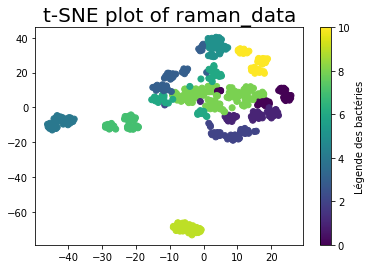

In [11]:
import matplotlib.pyplot as plt
plt.scatter(tsne_data[:,0],tsne_data[:,1], c=target)
plt.title("t-SNE plot of raman_data",fontsize=20)
colorbar = plt.colorbar()
colorbar.set_label("Légende des bactéries")

## 3D visualization of t-SNE plot

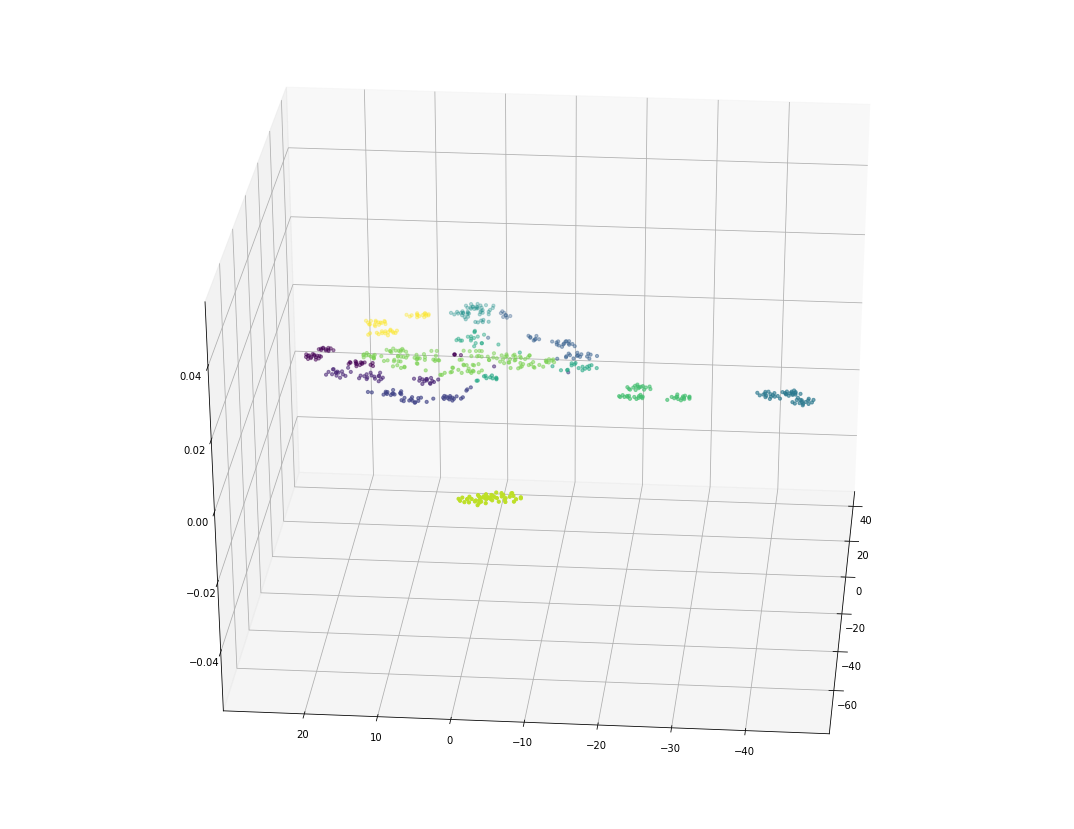

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(19,15))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(tsne_data[:,1],tsne_data[:,0],c=target,s=10)
ax.view_init(30,185)